In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [3]:
df.shape

(21, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


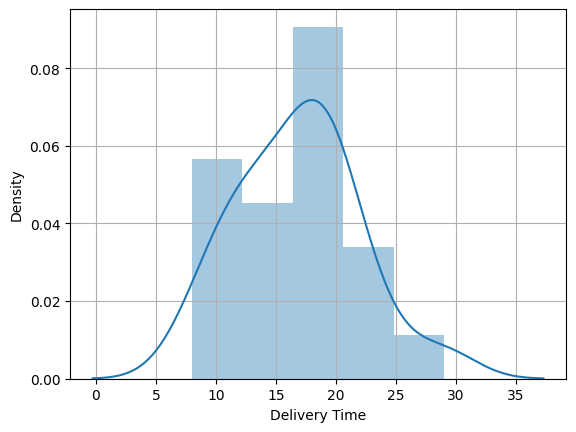

In [6]:
sns.distplot(df['Delivery Time'])
plt.grid()
plt.show()

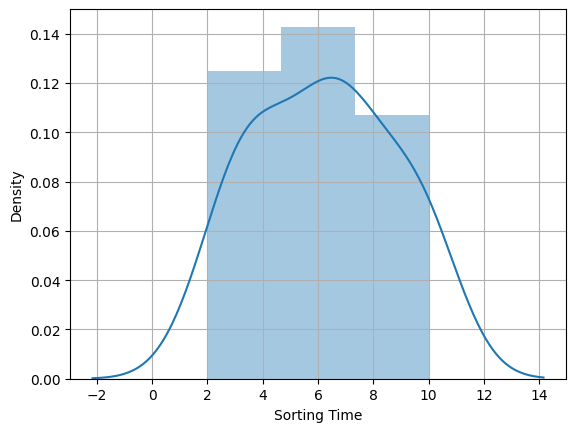

In [7]:
sns.distplot(df['Sorting Time'])
plt.grid()
plt.show()

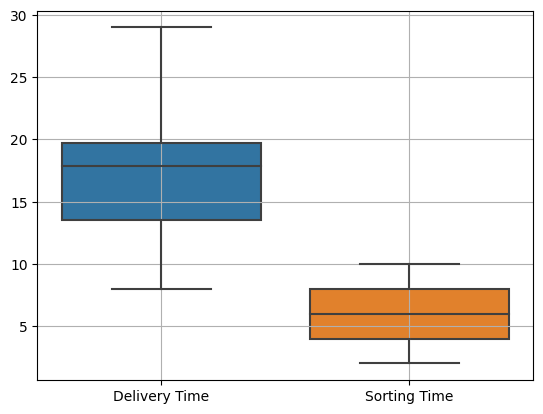

In [9]:
sns.boxplot(df)
plt.grid()
plt.show()

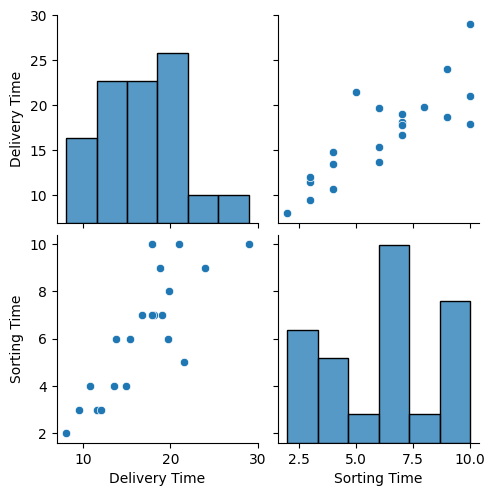

In [31]:
sns.pairplot(data=df)
plt.show()

#  Feature Engineering and Correlation

In [12]:
# renaming the column name

new_df = df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'}, axis=1)
new_df.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [14]:
new_df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


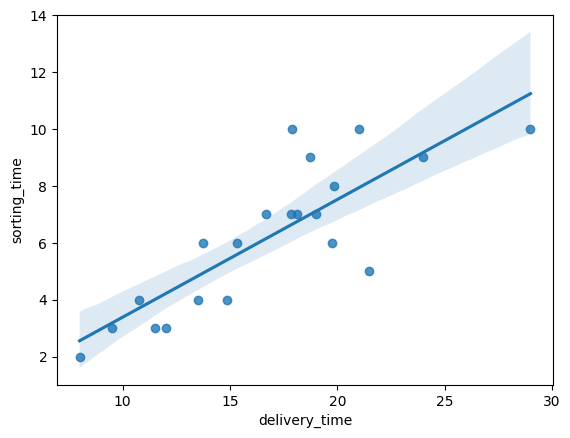

In [18]:
sns.regplot(x=new_df['delivery_time'], y=new_df['sorting_time'])
plt.show()

# Model Building

In [19]:
import statsmodels.formula.api as smf

In [39]:
model = smf.ols("delivery_time~sorting_time", data=new_df).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        23:48:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

In [24]:
# finding coefficient parameters

model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [26]:
# finding tvalues and pvalues

model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [27]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [28]:
# finding R-squared values

model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

## Model Prediction

In [33]:
new_series = pd.Series([5,10])
new_series

0     5
1    10
dtype: int64

In [37]:
prediction = pd.DataFrame(data=new_series, columns=['sorting_time'])
prediction

,sorting_time
0,5
1,10


In [38]:
model.predict(prediction)

0    14.827833
1    23.072933
dtype: float64